# Collapsed Gibbs sampler for the finite IBP approximation

In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from copy import deepcopy

import VI_algorithms_lib
import valez_finite_VI_lib
import gibbs_sampler_lib


## Draw data

In [6]:
# np.random.seed(5365) this seed works pretty well
np.random.seed(6874)

Num_samples = 500 # sample size
D = 2 # dimension
# so X will be a N\times D matrix

K_inf = 3 # take to be large for a good approximation to the IBP

alpha = 10 # IBP parameter

# Parameters to draw A from MVN
sigma_eps = .1 # variance of noise
sigma_A = 100

# generate data
Pi, Z, mu, A, X = valez_finite_VI_lib.generate_data(Num_samples, D, K_inf, sigma_A, sigma_eps, alpha)

K_approx = deepcopy(K_inf) # variational truncation


In [7]:
collapsed_GS = gibbs_sampler_lib.CollapsedGibbsSampler(X, K_approx, alpha, sigma_eps, sigma_A)

collapsed_GS.sample(100, 500)

N/A% (0 of 600) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

Sampling:


100% (600 of 600) |#######################| Elapsed Time: 0:09:55 Time: 0:09:55


Holy cow, done sampling!


Z (unpermuted): 
 [[1 1 1]
 [1 1 1]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 1 1]
 [0 0 1]
 [1 1 1]
 [0 1 1]
 [1 0 1]]
** procedure did not give a true permutation
permutation:  [0 1 2]
Z (permuted) 
 [[1 1 1]
 [1 1 1]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 1 1]
 [0 0 1]
 [1 1 1]
 [0 1 1]
 [1 0 1]]
round_nu 
 [[ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  0.  0.]
 [ 1.  1.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  0.]]
l1 error (after permutation):  [0.16800000000000001, 0.51000000000000001, 0.34200000000000003]


true A (permuted): 
 [[  6.37166758  13.13405874]
 [ -4.78830387  15.3506954 ]
 [-16.17643427 -10.04860216]]
poster mean A: 
 [[ -2.27973953  19.04033338]
 [-11.43182625   0.72730305]
 [-11.42290453   0.79141425]]


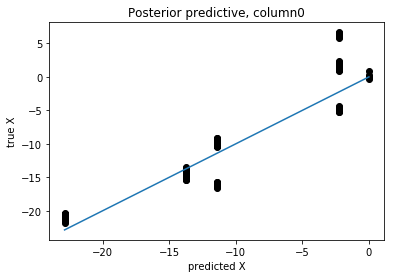

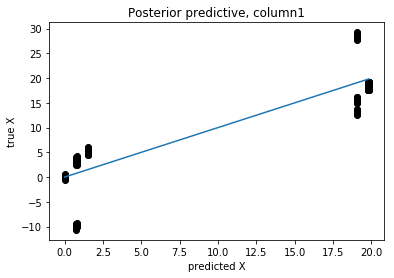

In [8]:
Z_Gibbs = np.mean(collapsed_GS.z_draws, 0)
[_, mean_A] = gibbs_sampler_lib.x_lp_cond_z(X, Z_Gibbs, sigma_eps, sigma_A, K_approx)
gibbs_sampler_lib.display_results_Gibbs(X, Z, Z_Gibbs, mean_A, A, manual_perm = None)

## Initialize

In [4]:
Z_Gibbs = np.random.binomial(1, Pi, [ Num_samples, K_inf ])

## Run collapsed Gibbs sampler

In [4]:
D = np.shape(X)[1]
N = np.shape(X)[0]
K = np.shape(Z_Gibbs)[1]

iteration = 500
for i in range(iteration): 
    for n in range(N): 
        for j in range(K): 
            Gibbs_sampler_lib.draw_Znk(X, Z_Gibbs, sigma_eps, sigma_A, alpha, n,j)
    print(i)
            
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Examine results of Gibbs sampler

Z (unpermuted): 
 [[1 0 1]
 [1 0 1]
 [1 1 1]
 [1 1 1]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 0 1]]
** procedure did not give a true permutation
permutation:  [0 1 2]
Z (permuted) 
 [[1 0 1]
 [1 0 1]
 [1 1 1]
 [1 1 1]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 0 1]]
round_nu 
 [[1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 0 0]]
l1 error (after permutation):  [0.002, 0.0, 0.40799999999999997]


true A (permuted): 
 [[  8.76865247   1.62280344]
 [ -9.84428435  18.66867903]
 [ -2.75346462  -0.29427976]]
poster mean A: 
 [[  6.22419869   1.34032829]
 [ -7.24484454  19.01079344]
 [ -2.83217866  -0.33300213]]


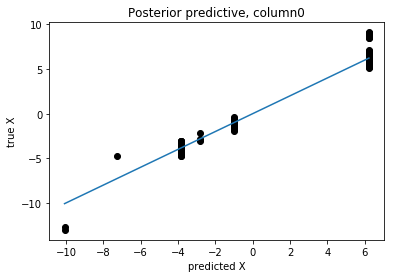

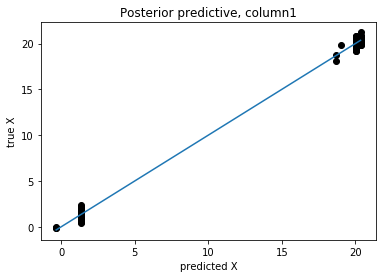

In [5]:
# compute A
[_, mean_A] = Gibbs_sampler_lib.likelihood_X(X, Z_Gibbs, sigma_eps, sigma_A)

Gibbs_sampler_lib.display_results_Gibbs(X, Z, Z_Gibbs, mean_A, A, manual_perm = None)

## Run VB

In [9]:
VI_instance = VI_algorithms_lib.VI_algorithms(X, K_approx, alpha, sigma_eps, sigma_A)

n_restart = 20
elbo_end = np.array([])

for i in range(n_restart): 
    VI_instance.re_init() # re initialize
    [tau_tmp, nu_tmp, phi_mu_tmp, phi_var_tmp, elbo] \
        = VI_instance.run_cavi_anneal(max_iter=500, tol=1e-6, verbose = False) # run cavi + annealing
        
    elbo_end = np.append(elbo_end, elbo[-1])
    
    # see if posterior predictive is better than all previous ones
    if (i == 0) or np.all(elbo_end[i] > elbo_end[:i]): 
        tau = deepcopy(tau_tmp)
        nu = deepcopy(nu_tmp)
        phi_mu = deepcopy(phi_mu_tmp)
        phi_var = deepcopy(phi_var_tmp)
    
    
print('max elbo: ', np.max(elbo_end))
print('average elbo', np.mean(elbo_end))

valez_finite_VI_lib.display_results(elbo, tau, nu, phi_mu, phi_var, X, Pi, Z, A)

TypeError: nu_updates() got an unexpected keyword argument 'anneal_temp'

In [ ]:
# compare results
VI_pred_X = np.dot(nu, phi_mu.T)
Gibbs_pred_X = np.dot(Z_Gibbs, mean_A)

for col in range(D):
    plt.clf()
    plt.plot(VI_pred_X[:, col], Gibbs_pred_X[:, col], 'ko')
    diag = np.linspace(np.min(VI_pred_X[:,col]),np.max(VI_pred_X[:,col]))
    plt.plot(diag,diag)
    
    plt.title('Posterior predictive, VB vs Gibbs, column' + str(col))
    plt.xlabel('VI_pred_X')
    plt.ylabel('Gibbs_pred_X')
    plt.show()


In [ ]:
# posterior covariances of mu
# compare against truth
# rank 1 updates
# bigger data
# beta parameter type